In [1]:
import pandas as pd
import re
import string
# from bs4 import BeautifulSoup
import nltk
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import spacy
from nltk.probability import FreqDist
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# !pip install spacy
# !python -m spacy download en_core_web_sm
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

In [3]:
data_df = pd.read_csv("../rtgender/fitocracy_posts.csv")

In [4]:
data_df.head()

,op_id,op_gender,post_id,post_text
0,102,W,0,Thanks for the follow! I followed back :) I ...
1,104,W,1,I've decided I have this crazy goal of running...
2,104,W,2,"Umm, yeah, so those are assisted pull-ups. Bef..."
3,117,M,3,dam gurl lookin mad tone in dat pp holla bb
4,117,M,4,What's up there bear mode?


In [5]:
data_df1 = data_df.copy()

In [6]:
# Load spacy
nlp = spacy.load('en_core_web_sm')

def clean_string(text, stopwords = False, stem="None"):

    final_string = ""

    # Make lower
    text = text.lower()

#     # Remove line breaks
#     text = re.sub(r'\n', '', text)

#     # Remove puncuation
#     translator = str.maketrans('', '', string.punctuation)
#     text = text.translate(translator)

    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'\S+www\S+', '', text)
    
    
    # Remove stop words
    text = text.split()
    text_filtered = text
    if stopwords == True:
        useless_words = nltk.corpus.stopwords.words("english")
#         useless_words = useless_words + ['hi', 'im']

        text_filtered = [word for word in text if not word in useless_words]

        # Remove numbers
        text_filtered = [re.sub(r'\w*\d\w*', '', w) for w in text_filtered]
#     else:
#         text_filtered = text
    # Stem or Lemmatize
    if stem == 'Stem':
        stemmer = PorterStemmer() 
        text_stemmed = [stemmer.stem(y) for y in text_filtered]
    elif stem == 'Lem':
        lem = WordNetLemmatizer()
        text_stemmed = [lem.lemmatize(y) for y in text_filtered]
    elif stem == 'Spacy':
        text_filtered = nlp(' '.join(text_filtered))
        text_stemmed = [y.lemma_ for y in text_filtered]
    else:
        text_stemmed = text_filtered

    final_string = ' '.join(text_stemmed)

    return final_string

In [7]:
data_df2 = data_df.copy()

In [8]:
data_df2['post_text'] = data_df2['post_text'].astype(str)

In [9]:
data_df2['post_text_cleaned'] = data_df2['post_text'].apply(lambda x: clean_string(x, stopwords = True, stem='Lem'))


In [10]:
data_df2['post_text_cleaned']

0         thanks follow! followed back :) wanna kick but...
1                i've decided crazy goal running triathlon.
2         umm, yeah, assisted pull-ups. everyone start t...
3                  dam gurl lookin mad tone dat pp holla bb
4                                         what's bear mode?
                                ...                        
318530    ok, lazy since joined. made promise sedentary ...
318531    need verbal ass-kicking. laziness strong today...
318532                                       thanks props!!
318533    hi loolou! welcome fitocracy! :) ask... exerci...
318534    welcome! thanks following! gladly following back!
Name: post_text_cleaned, Length: 318535, dtype: object

In [11]:
data_df2['post_text_cleaned1'] = data_df2['post_text_cleaned'].str.split()

In [12]:
data_df2['post_text_cleaned1']

0         [thanks, follow!, followed, back, :), wanna, k...
1         [i've, decided, crazy, goal, running, triathlon.]
2         [umm,, yeah,, assisted, pull-ups., everyone, s...
3         [dam, gurl, lookin, mad, tone, dat, pp, holla,...
4                                     [what's, bear, mode?]
                                ...                        
318530    [ok,, lazy, since, joined., made, promise, sed...
318531    [need, verbal, ass-kicking., laziness, strong,...
318532                                    [thanks, props!!]
318533    [hi, loolou!, welcome, fitocracy!, :), ask...,...
318534    [welcome!, thanks, following!, gladly, followi...
Name: post_text_cleaned1, Length: 318535, dtype: object

In [13]:
data_df2['post_text_cleaned']

0         thanks follow! followed back :) wanna kick but...
1                i've decided crazy goal running triathlon.
2         umm, yeah, assisted pull-ups. everyone start t...
3                  dam gurl lookin mad tone dat pp holla bb
4                                         what's bear mode?
                                ...                        
318530    ok, lazy since joined. made promise sedentary ...
318531    need verbal ass-kicking. laziness strong today...
318532                                       thanks props!!
318533    hi loolou! welcome fitocracy! :) ask... exerci...
318534    welcome! thanks following! gladly following back!
Name: post_text_cleaned, Length: 318535, dtype: object

In [14]:
data_df2.to_csv("./preprocessed_data/fitness_posts_preprocssed_lem_stopwords_removal.csv")

In [15]:
all_words1 = ''
all_words = data_df2.groupby(['op_gender']).agg({'post_text_cleaned': ' '.join}).reset_index()
print(all_words)


  op_gender                                  post_text_cleaned
0         M  dam gurl lookin mad tone dat pp holla bb what'...
1         W  thanks follow! followed back :) wanna kick but...


In [16]:



all_words[all_words['op_gender']=='M']['post_text_cleaned']

0    dam gurl lookin mad tone dat pp holla bb what'...
Name: post_text_cleaned, dtype: object

In [17]:
#the NLTK FreqDist gives a count for how often each part of the text occurs
fd_wct1_M = FreqDist(all_words[all_words['op_gender']=='M']['post_text_cleaned'][0].split())
# fd_wct1_M

In [20]:
fd_wct1_F = FreqDist(all_words[all_words['op_gender']=='W']['post_text_cleaned'].values[0].split(" "))


In [21]:
print(fd_wct1_M.most_common(40))


[('thanks', 48539), ('joined', 27979), ('group!', 27647), ('-', 18817), ('follow', 14621), ('fitocracy', 14558), ('welcome', 14473), ('following', 14297), ('back', 13759), ('wtf', 12569), (':)', 12060), ("i'm", 11997), ('follow!', 10456), ('prop', 9187), ('get', 9125), ('good', 8406), ('like', 8187), ('back!', 7577), ('workout', 6272), ('new', 6119), ('follow,', 5645), ('back.', 5640), ('day', 5531), ('follow.', 5424), ('hey', 5231), ('time', 5105), ('keep', 4982), ('gym', 4982), ('great', 4903), ('going', 4901), ('see', 4716), ('work', 4460), ('got', 4454), ('one', 4262), ('look', 4076), ("i've", 3978), ('thank', 3944), ('know', 3800), ('nice', 3721), ('week', 3680)]


In [22]:
print(fd_wct1_F.most_common(40))


[('thanks', 40781), ('joined', 29058), ('group!', 28618), (':)', 21761), ('', 17820), ('-', 15521), ('fitocracy', 15454), ('following', 13734), ("i'm", 13654), ('follow!', 13574), ('back', 13277), ('welcome', 11915), ('follow', 10914), ('wtf', 10331), ('get', 8081), ('weight', 7342), ('like', 6730), ('back!', 6728), ('prop', 6352), ('good', 5768), ('workout', 5464), ('day', 5267), ('love', 5183), ('new', 4850), ('thank', 4610), ('going', 4501), ('time', 4321), ('girl', 4292), (':d', 4288), ("i've", 4191), ('barbie', 4115), ('follow,', 4104), ('work', 4066), ('strong', 3977), ('gone', 3917), ('gym', 3881), ('really', 3791), ('one', 3630), ('got', 3560), ('know', 3538)]


In [23]:
fd_wct1_M

FreqDist({'thanks': 48539, 'joined': 27979, 'group!': 27647, '-': 18817, 'follow': 14621, 'fitocracy': 14558, 'welcome': 14473, 'following': 14297, 'back': 13759, 'wtf': 12569, ...})

In [24]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data_df2['post_text_cleaned'])
features = vectorizer.get_feature_names_out()
y = data_df2['op_gender']

In [25]:
print(features[:30])

['__' '___' '____' '_____' '______' '_______' '________' '___________'
 '_____________' '_________________' '_________________________'
 '__________________________________'
 '____________________________________'
 '_________________________________________________________________________keep'
 '_again_' '_any_' '_atlas_' '_awe_' '_bomb_' '_don' '_everywhere_'
 '_exactly_' '_excuse_' '_fabulous_' '_fantastic_' '_fluff_' '_great_'
 '_i_' '_idea_' '_is_']


In [26]:
X.shape, len(y), len(features)

((318535, 59315), 318535, 59315)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [28]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
print(clf.predict(X[:2, :]))
print(clf.predict_proba(X[:2, :]))
# >>> clf.score(X, y)

['W' 'M']
[[0.26712359 0.73287641]
 [0.58039469 0.41960531]]


In [29]:
y[:2]

0    W
1    W
Name: op_gender, dtype: object

In [30]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
# solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
# grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid = dict(penalty=penalty,C=c_values)
cv = StratifiedKFold(n_splits=5,  shuffle = True, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.628986 using {'C': 0.1, 'penalty': 'l2'}
0.622895 (0.001855) with: {'C': 100, 'penalty': 'l2'}
0.622173 (0.001197) with: {'C': 10, 'penalty': 'l2'}
0.626648 (0.002636) with: {'C': 1.0, 'penalty': 'l2'}
0.628986 (0.002462) with: {'C': 0.1, 'penalty': 'l2'}
0.619981 (0.001518) with: {'C': 0.01, 'penalty': 'l2'}


In [31]:
test_pred = grid_result.predict(X_test)
from sklearn.metrics import accuracy_score
test_acc = accuracy_score(y_test, test_pred)
print("test accuracy : ", test_acc)

test accuracy :  0.6291180303851899


In [32]:
all_pred = grid_result.predict(X)
from sklearn.metrics import accuracy_score
all_acc = accuracy_score(y, all_pred)
print("overall accuracy : ", all_acc)

overall accuracy :  0.6463496946960302


In [33]:
grid_result.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [34]:
# get importance
importance = grid_result.best_estimator_.coef_[0]
feature_importance = pd.DataFrame({"importance":importance, "features":features})
feature_importance

,importance,features
0,0.540685,__
1,0.125821,___
2,0.032827,____
3,-0.056392,_____
4,-0.054158,______
...,...,...
59310,0.044675,zzzzzzzzzzzzzz
59311,-0.036337,zzzzzzzzzzzzzzz
59312,-0.025522,zzzzzzzzzzzzzzzzzzz
59313,0.000000,zzzzzzzzzzzzzzzzzzzzz


In [35]:
feature_importance.sort_values(['importance'],  key=abs, inplace=True)
feature_importance


,importance,features
14688,0.000000,dreadmill
13426,0.000000,diabetis
13427,0.000000,diabled
45226,0.000000,schminjury
13430,0.000000,diabolicalkitty
...,...,...
6769,-1.674249,bro
30076,1.715621,lifter
32090,-1.906332,mate
1989,2.499534,angel


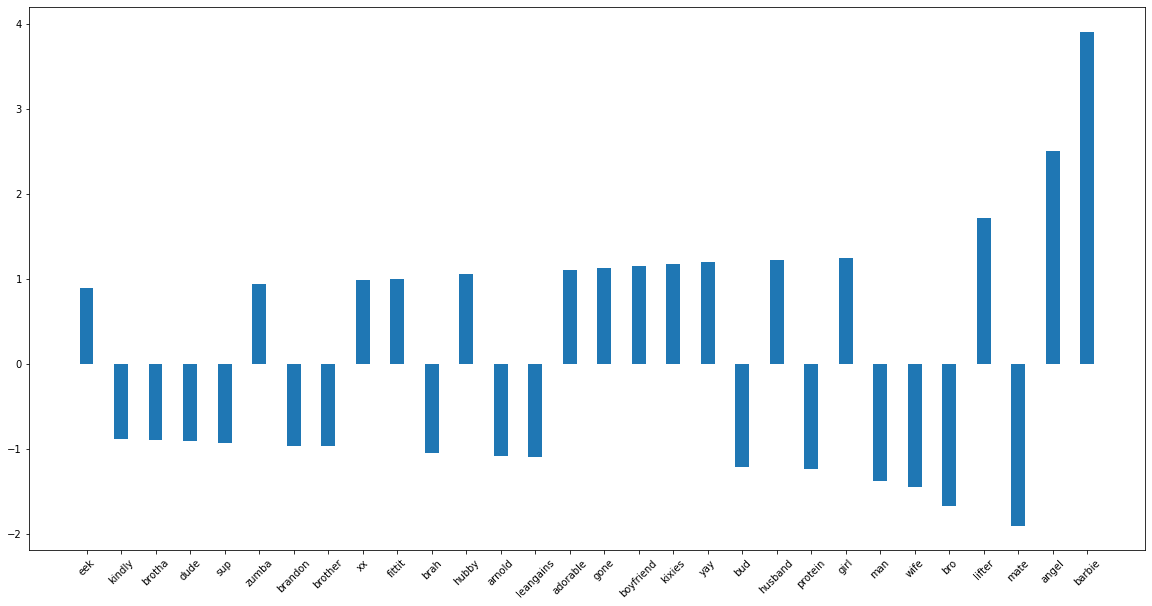

In [36]:
# plot feature importance
plt.figure(figsize=(20, 10))
plt.bar(feature_importance['features'][-30:], feature_importance['importance'][-30:], width = 0.4)
plt.xticks(rotation=45)
plt.show()

In [37]:
# visualize most freuquent words

In [38]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data_df2['post_text_cleaned'])
features = vectorizer.get_feature_names_out()
y = data_df2['op_gender']

In [39]:
print(features[:30])

['__' '___' '____' '_____' '______' '_______' '________' '___________'
 '_____________' '_________________' '_________________________'
 '__________________________________'
 '____________________________________'
 '_________________________________________________________________________keep'
 '_again_' '_any_' '_atlas_' '_awe_' '_bomb_' '_don' '_everywhere_'
 '_exactly_' '_excuse_' '_fabulous_' '_fantastic_' '_fluff_' '_great_'
 '_i_' '_idea_' '_is_']


In [40]:
X.shape, len(y), len(features)

((318535, 59315), 318535, 59315)

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [42]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
print(clf.predict(X[:2, :]))
print(clf.predict_proba(X[:2, :]))
# >>> clf.score(X, y)

['W' 'M']
[[0.29242348 0.70757652]
 [0.51693134 0.48306866]]


In [43]:
y[:2]

0    W
1    W
Name: op_gender, dtype: object

In [44]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
# solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
# grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid = dict(penalty=penalty,C=c_values)
cv = StratifiedKFold(n_splits=5,  shuffle = True, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.634342 using {'C': 1.0, 'penalty': 'l2'}
0.626882 (0.000472) with: {'C': 100, 'penalty': 'l2'}
0.627651 (0.001087) with: {'C': 10, 'penalty': 'l2'}
0.634342 (0.001778) with: {'C': 1.0, 'penalty': 'l2'}
0.627988 (0.001753) with: {'C': 0.1, 'penalty': 'l2'}
0.600807 (0.001618) with: {'C': 0.01, 'penalty': 'l2'}


In [45]:
test_pred = grid_result.predict(X_test)
from sklearn.metrics import accuracy_score
test_acc = accuracy_score(y_test, test_pred)
print("test accuracy : ", test_acc)

test accuracy :  0.6343978614305964


In [46]:
all_pred = grid_result.predict(X)
from sklearn.metrics import accuracy_score
all_acc = accuracy_score(y, all_pred)
print("overall accuracy : ", all_acc)

overall accuracy :  0.6587156827350212


In [47]:
grid_result.best_params_

{'C': 1.0, 'penalty': 'l2'}

In [48]:
# get importance
importance = grid_result.best_estimator_.coef_[0]
feature_importance = pd.DataFrame({"importance":importance, "features":features})
feature_importance

,importance,features
0,2.340326,__
1,0.769659,___
2,0.094181,____
3,0.231952,_____
4,-0.248190,______
...,...,...
59310,0.117992,zzzzzzzzzzzzzz
59311,-0.221998,zzzzzzzzzzzzzzz
59312,-0.082427,zzzzzzzzzzzzzzzzzzz
59313,0.000000,zzzzzzzzzzzzzzzzzzzzz


In [49]:
feature_importance.sort_values(['importance'],  key=abs, inplace=True)
feature_importance


,importance,features
56237,0.000000,wallking
30511,0.000000,lobotomy
52300,0.000000,thsi
55714,0.000000,vimeo
41341,0.000000,purr
...,...,...
24843,4.110160,husband
6397,4.242021,boyfriend
1989,4.411812,angel
57324,-4.471930,wife


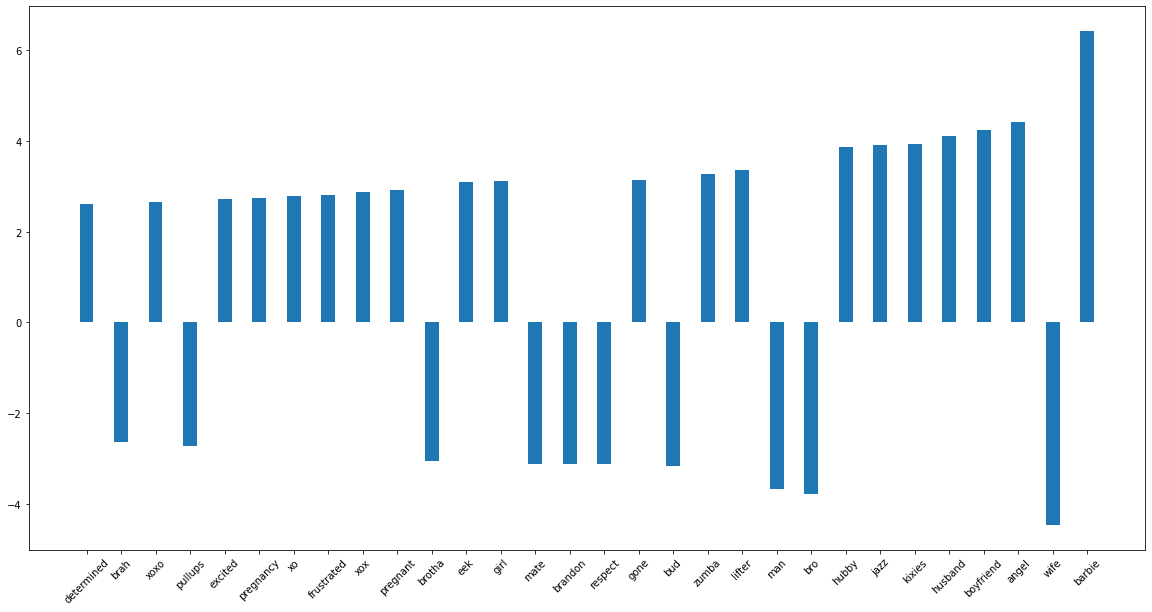

In [51]:
# plot feature importance
plt.figure(figsize=(20, 10))
plt.bar(feature_importance['features'][-30:], feature_importance['importance'][-30:], width = 0.4)
plt.xticks(rotation=45)
plt.show()

In [52]:
# visualize most freuquent words 

In [53]:
df_M = pd.DataFrame(fd_wct1_M.items(), columns=['word', 'n'])
cnt = 0 
total_words_M = sum(fd_wct1_M.values())
df_M['total_words'] = total_words_M
df_M['gender'] ='M'
df_M

,word,n,total_words,gender
0,dam,16,1409586,M
1,gurl,11,1409586,M
2,lookin,165,1409586,M
3,mad,180,1409586,M
4,tone,33,1409586,M
...,...,...,...,...
109828,hesitating,1,1409586,M
109829,heel),1,1409586,M
109830,worker.,1,1409586,M
109831,ass-kicking.,1,1409586,M


In [54]:
df_F = pd.DataFrame(fd_wct1_F.items(), columns=['word', 'n'])
cnt = 0 
total_words_F = sum(fd_wct1_F.values())
df_F['total_words'] = total_words_F
df_F['gender'] ='W'
df_F

,word,n,total_words,gender
0,thanks,40781,1279990,W
1,follow!,13574,1279990,W
2,followed,893,1279990,W
3,back,13277,1279990,W
4,:),21761,1279990,W
...,...,...,...,...
93934,"""leg""",1,1279990,W
93935,"""chest""",1,1279990,W
93936,too@blonde_ninja,1,1279990,W
93937,@irvaler,1,1279990,W


In [55]:
df_all_for_R = pd.concat([df_M, df_F])
df_all_for_R

,word,n,total_words,gender
0,dam,16,1409586,M
1,gurl,11,1409586,M
2,lookin,165,1409586,M
3,mad,180,1409586,M
4,tone,33,1409586,M
...,...,...,...,...
93934,"""leg""",1,1279990,W
93935,"""chest""",1,1279990,W
93936,too@blonde_ninja,1,1279990,W
93937,@irvaler,1,1279990,W


In [56]:
df_all_for_R.to_csv("./preprocessed_data/fitness_posts_preprocressed_for_R.csv")

In [ ]:
# after running R codes for weighted log odds

In [57]:
df_all_for_R.to_csv("./preprocessed_data/fitness_congress_posts_preprocressed_for_R.csv")

In [60]:
weighted_log_odds_df = pd.read_csv("./preprocessed_data/fitness_post_weighted_log_odds.csv")
weighted_log_odds_df.sort_values(['log_odds_weighted'], inplace=True)

In [61]:
weighted_log_odds_df

,Unnamed: 0,X,word,n,total_words,gender,log_odds_weighted
45455,45456,45455,barbie,24,1409586,M,-23.283424
895,896,895,:),12060,1409586,M,-21.099837
1960,1961,1960,girl,404,1409586,M,-20.818907
931,932,931,gone,346,1409586,M,-20.062166
1647,1648,1647,strong,497,1409586,M,-19.114303
...,...,...,...,...,...,...,...
111011,111012,1178,gone,3917,1279990,W,18.632991
110511,110512,678,girl,4292,1279990,W,19.356366
109837,109838,4,:),21761,1279990,W,20.818623
111331,111332,1498,barbie,4115,1279990,W,21.292668


In [62]:
weighted_log_odds_df = weighted_log_odds_df.dropna()
weighted_log_odds_df

,Unnamed: 0,X,word,n,total_words,gender,log_odds_weighted
45455,45456,45455,barbie,24,1409586,M,-23.283424
895,896,895,:),12060,1409586,M,-21.099837
1960,1961,1960,girl,404,1409586,M,-20.818907
931,932,931,gone,346,1409586,M,-20.062166
1647,1648,1647,strong,497,1409586,M,-19.114303
...,...,...,...,...,...,...,...
110515,110516,682,strong,3977,1279990,W,17.864426
111011,111012,1178,gone,3917,1279990,W,18.632991
110511,110512,678,girl,4292,1279990,W,19.356366
109837,109838,4,:),21761,1279990,W,20.818623


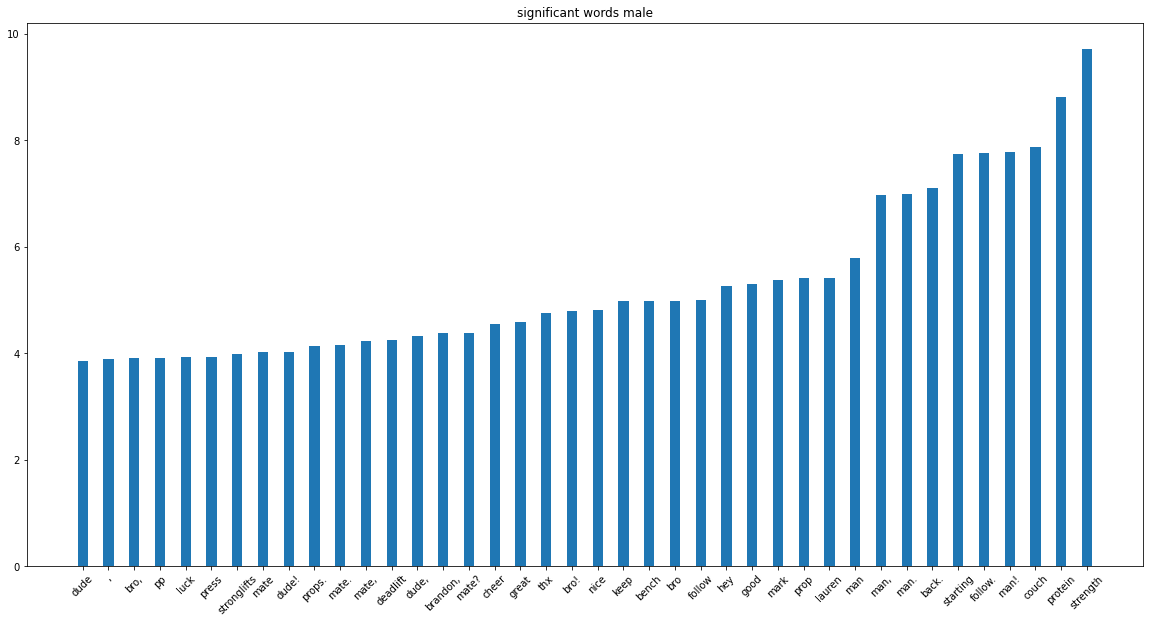

In [63]:
filtered_df = weighted_log_odds_df[weighted_log_odds_df['gender']=='M']
plt.figure(figsize=(20, 10))
plt.bar(filtered_df['word'][-40:], filtered_df['log_odds_weighted'][-40:], width=0.4)
plt.title("significant words male")
plt.xticks(rotation=45)
plt.show()

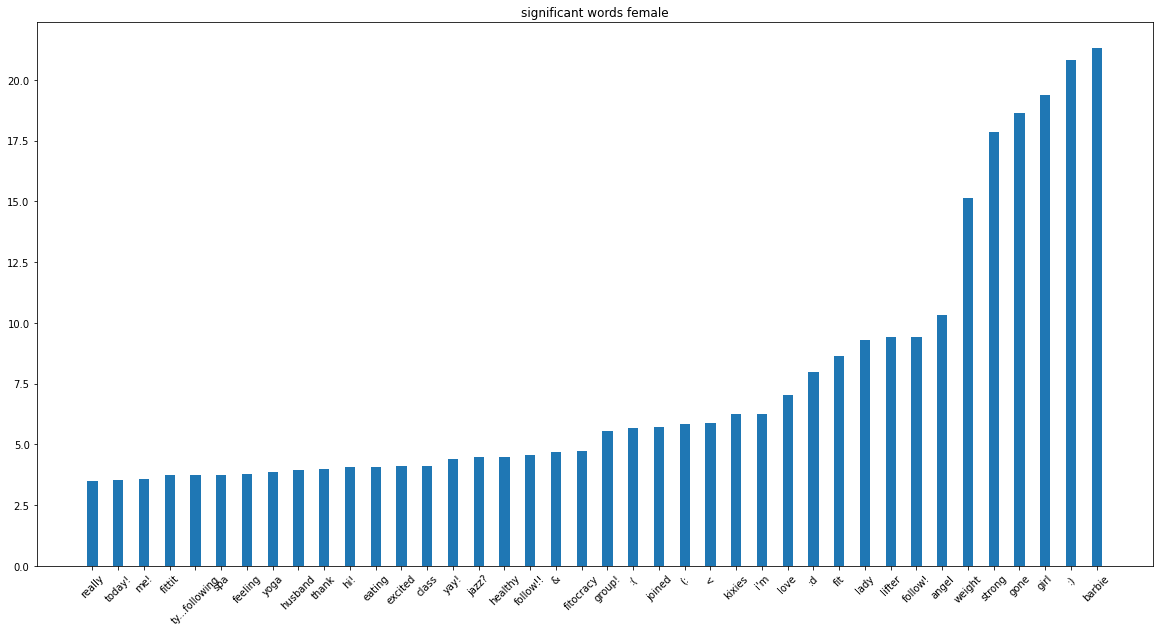

In [64]:
filtered_df = weighted_log_odds_df[weighted_log_odds_df['gender']=='W']
plt.figure(figsize=(20, 10))
plt.bar(filtered_df['word'][-40:], filtered_df['log_odds_weighted'][-40:], width=0.4)
plt.title("significant words female")
plt.xticks(rotation=45)
plt.show()